# 状态树

其实可以看作是穷举法的一个分支，也是要遍历可以达到的各种状态，关键是如何遍历？实际上是广度优先搜索方法。如果把状态的记录作为算法的一部分，也可以看作是动态规划的思想应用。

下面可以从几个典型例子来说明：

## · N个水桶倒水问题


- 题目一：两个水桶，容积分别为7升和3升，有无限多的水，问如何能获得2升的水? 

思路：

两个水桶，初始状态都为0升水，记为状态(0,0)。每次加水，倒水等操作都会产生新的状态，可以用状态树来跟踪这些状态，如果新状态不在状态树中，则增加进状态树。

构建状态树需要按照一定的规则，从低层次开始，不断增加层次进行构造。最终达到特定状态，每个状态的层次代表到达该状态所需要经历的步骤数目。

状态树法的局限：状态数目有限，并且不能太多。

In [1]:
M = (7, 3)
b = [0, 0]

定义各种加水、倒水的函数

把桶填满，把桶中水全部倒出，把水从一个桶倒入另一个桶

In [2]:
# 把桶填满
def Fill(idx):
    if b[idx] < M[idx]:
        b[idx] = M[idx]
        return True
    return False

# 把桶倒空
def Empty(idx):
    if b[idx] > 0:
        b[idx] = 0
        return True
    return False

# 从fidx桶倒入tidx桶，分两种情况：能填满与不能填满
def Transfer(fidx, tidx):
    if(b[tidx]!=M[tidx] and b[fidx]>0):
        if (b[fidx]+b[tidx])>=M[tidx]: # 能填满
            b[fidx] = b[fidx]+b[tidx]-M[tidx]
            b[tidx] = M[tidx]
        else: # 不能填满
            b[tidx] = b[fidx]+b[tidx]
            b[fidx] = 0
        return True
    return False

声明状态字典，用来存储状态值，如果出现过这种状态，状态字典里就有这个状态的key，相应的value值表示经过几个步骤可以到达该状态，以及上一个状态；否则字典里没有这个key，需要添加进状态字典里。

In [3]:
stat = {}

每次加水或倒水都会生成新的状态，如果这个生成的状态已经存在过了，那么就不需要更新该状态了，否则需要把状态放入状态表中。

In [4]:
def insertStat(b0, b1, stepnum, laststat):
    s = (b0, b1)
    if (not s in stat):
        stat[s] = (stepnum, laststat)
        return True
    return False

状态集合初始为第0级，就是什么都不做的状态，两个桶都是0，层级数也设为0。

再进一步倒水或加水都会形成新的一层。

执行下面代码后，stat中的key值(0,0)代表已有状态，value值分成两个部分，第一个部分0代表第0层（即第0步可以到达该状态），第二个代表上一个状态，此时因为没有上一个状态，所以写None，表示没有上一状态。

In [5]:
insertStat(0,0,0,None)
print(stat)

{(0, 0): (0, None)}


第一层次，即从两个桶都为0的状态下，进行一步加水倒水操作可以到达的状态

In [6]:
stepnum = 1
tmp = b[:] # tmp的作用是保存初始时b的状态，注意这里不能用tmp=b，在python中，这个语句会导致tmp和b实际上是同一个列表，起不到保存初始值的作用
for i in range(2):
    if(tmp[i]<M[i]):
        if(Fill(i)):
            insertStat(b[0],b[1],stepnum,(tmp[0],tmp[1]))
            b = tmp[:]

for i in range(2):
    if(tmp[i]>0):
        if(Empty(i)):
            insertStat(b[0],b[1],stepnum,(tmp[0],tmp[1]))
            b = tmp[:]

if(Transfer(0,1)):
    insertStat(b[0],b[1],stepnum,(tmp[0],tmp[1]))
    b = tmp[:]
if(Transfer(1,0)):
    insertStat(b[0],b[1],stepnum,(tmp[0],tmp[1]))
    b = tmp[:]

print(stat)

{(0, 0): (0, None), (7, 0): (1, (0, 0)), (0, 3): (1, (0, 0))}


可以将此过程写成一个循环判断，不断增加新的层次，得到本题的结果（第六步时即可得到2升水）

In [7]:
stat = {}
insertStat(0,0,0,None)
b = [0,0]

Flag = True # Flag 代表是否有新的状态

stepnum = 0

current = [[0,0]]
newstat = []

while Flag:
    Flag = False 
    newstat.clear()
    stepnum = stepnum+1
    for s in current:
        tmp = s[:]
        b = s[:]
        for i in range(2):
            if(tmp[i]<M[i]):
                if(Fill(i)):
                    if(insertStat(b[0],b[1],stepnum,(tmp[0],tmp[1]))):
                        Flag = True
                        newstat.append([b[0],b[1]])
                    b = tmp[:]
        for i in range(2):
            if(tmp[i]>0):
                if(Empty(i)):
                    if(insertStat(b[0],b[1],stepnum,(tmp[0],tmp[1]))):
                        Flag = True
                        newstat.append([b[0],b[1]])
                    b = tmp[:]

        if(Transfer(0,1)):
            if(insertStat(b[0],b[1],stepnum,(tmp[0],tmp[1]))):
                Flag = True
                newstat.append([b[0],b[1]])
            b = tmp[:]
        if(Transfer(1,0)):
            if(insertStat(b[0],b[1],stepnum,(tmp[0],tmp[1]))):
                Flag = True
                newstat.append([b[0],b[1]])
            b = tmp[:]
    current.clear()
    current = newstat[:]
    if Flag:
        print(stepnum, ":", current)

print(stat)

1 : [[7, 0], [0, 3]]
2 : [[7, 3], [4, 3], [3, 0]]
3 : [[4, 0], [3, 3]]
4 : [[1, 3], [6, 0]]
5 : [[1, 0], [6, 3]]
6 : [[0, 1], [7, 2]]
7 : [[7, 1], [0, 2]]
8 : [[5, 3], [2, 0]]
9 : [[5, 0], [2, 3]]
{(0, 0): (0, None), (7, 0): (1, (0, 0)), (0, 3): (1, (0, 0)), (7, 3): (2, (7, 0)), (4, 3): (2, (7, 0)), (3, 0): (2, (0, 3)), (4, 0): (3, (4, 3)), (3, 3): (3, (3, 0)), (1, 3): (4, (4, 0)), (6, 0): (4, (3, 3)), (1, 0): (5, (1, 3)), (6, 3): (5, (6, 0)), (0, 1): (6, (1, 0)), (7, 2): (6, (6, 3)), (7, 1): (7, (0, 1)), (0, 2): (7, (7, 2)), (5, 3): (8, (7, 1)), (2, 0): (8, (0, 2)), (5, 0): (9, (5, 3)), (2, 3): (9, (2, 0))}


通过状态集合可以追溯如何到达该状态:

In [8]:
def findTarget(target):
    for key, value in stat.items():
        if(key[0]==target or key[1]==target):
            return key
    return None

target = 2
s = findTarget(target)

if s is not None:
    print("终止状态：第一个水桶中有水%d升，第二个水桶中有水%d升，最快%d步可达到，过程如下："%(s[0], s[1], stat[s][0]))

    trace = []
    t = s
    trace.append(t)
    while True:
        tmp = stat[t][1]
        if tmp is not None:
            trace.append(tmp)
        else:
            break
        t = tmp

    while trace:
        if len(trace)>1:
            print(trace.pop(), end="->")
        else:
            print(trace.pop())
else:
    print("目前条件无法获得%d升水"%target)


终止状态：第一个水桶中有水7升，第二个水桶中有水2升，最快6步可达到，过程如下：
(0, 0)->(0, 3)->(3, 0)->(3, 3)->(6, 0)->(6, 3)->(7, 2)


使用graphiz直观看到树结构

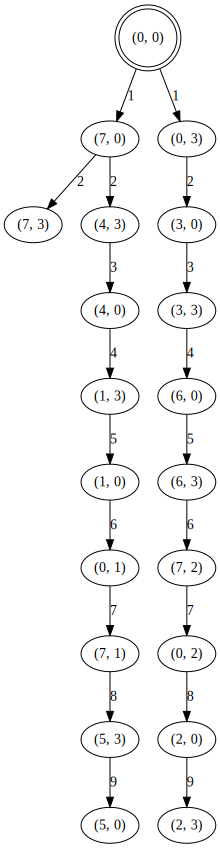

In [14]:
from graphviz import Digraph
u = Digraph()

stat = {}
insertStat(0,0,0,None)
b = [0,0]

Flag = True # Flag 代表是否有新的状态

stepnum = 0

current = [[0,0]]
newstat = []

u.node("(0, 0)", shape="doublecircle")

while Flag:
    Flag = False 
    newstat.clear()
    stepnum = stepnum+1
    for s in current:
        tmp = s[:]
        b = s[:]
        for i in range(2):
            if(tmp[i]<M[i]):
                if(Fill(i)):
                    if(insertStat(b[0],b[1],stepnum,(tmp[0],tmp[1]))):
                        Flag = True
                        newstat.append([b[0],b[1]])
                        u.edge(str((tmp[0],tmp[1])), str((b[0], b[1])), label=str(stepnum))
                    b = tmp[:]
        for i in range(2):
            if(tmp[i]>0):
                if(Empty(i)):
                    if(insertStat(b[0],b[1],stepnum,(tmp[0],tmp[1]))):
                        Flag = True
                        newstat.append([b[0],b[1]])
                        u.edge(str((tmp[0],tmp[1])), str((b[0], b[1])), label=str(stepnum))
                    b = tmp[:]

        if(Transfer(0,1)):
            if(insertStat(b[0],b[1],stepnum,(tmp[0],tmp[1]))):
                Flag = True
                newstat.append([b[0],b[1]])
                u.edge(str((tmp[0],tmp[1])), str((b[0], b[1])), label=str(stepnum))
            b = tmp[:]
        if(Transfer(1,0)):
            if(insertStat(b[0],b[1],stepnum,(tmp[0],tmp[1]))):
                Flag = True
                newstat.append([b[0],b[1]])
                u.edge(str((tmp[0],tmp[1])), str((b[0], b[1])), label=str(stepnum))
            b = tmp[:]
    current.clear()
    current = newstat[:]

u

- 题目二：有3个水桶的容量为8升，5升和3升。 8升水桶里面装满了水。如果利用另外两个桶，得到4升水？ (没有无限水)

In [1]:
# 思路与上面一样，代码写在下面

其他相似问题
- 卖牛奶的人有两桶10升的牛奶，两个顾客各带容器去买2升牛奶，一个带的是5升的容器，一个带的是4升的容器，这位卖牛奶的人应该如何解决问题？
- 三个没有刻度，容积分别为160升，119升和77升的空桶，和无限多的水，想要量出76升的水，至少需要进行多少次操作？

## 2 狼羊菜过河

- 题目一：一个农夫带着狼，羊和白菜想要过河，河边有一艘小船，只有农夫可以驾驶小船，而且农夫每次只能带一样东西过河，已知如果农夫不在旁边，那么，狼会吃掉羊，羊会吃掉白菜，农夫应该怎么过河？

题目分析：农夫狼羊菜都在左边构成初始状态，农夫狼羊菜都在右边构成最后状态。可以用集合来表示这些组合的元素。根据题目要求设置一些限制条件。然后设置农夫可以带某样东西过河，或者带某样东西返回。这样就可以形成很多状态。如果达到终局状态则退出。

In [1]:
farmer = 0
wolf = 1
sheep = 2
cabbage = 3

left = {farmer, wolf, sheep, cabbage}
right = set()

定义行动

In [2]:
def left2right(obj):
    if farmer in left:
        if obj is not None:
            if obj in left:
                right.add(farmer)
                right.add(obj)
                left.remove(farmer)
                left.remove(obj)
                return True
        else:
            right.add(farmer)
            left.remove(farmer)
            return True
    return False

def right2left(obj):
    if farmer in right:
        if obj is not None:
            if obj in right:
                left.add(farmer)
                left.add(obj)
                right.remove(farmer)
                right.remove(obj)
                return True
        else:
            left.add(farmer)
            right.remove(farmer)
            return True
    return False

def isValid(objs):
    if not farmer in objs:
        if wolf in objs and sheep in objs:
            return False
        if cabbage in objs and sheep in objs:
            return False
    return True


测试行动函数

In [3]:
left2right(wolf)
print(left)
print(right)
print(isValid(left))
print(isValid(right))

{2, 3}
{0, 1}
False
True


定义状态字典

In [13]:
leftstat = {}
rightstat = {}

In [14]:
def set2numstring(objs):
    num = 0
    for obj in objs:
        num |= 1<<obj;
    return str(num)

def numstring2set(string):
    num = int(string)
    s = set()
    if(num&(1<<farmer)!=0):
        s.add(farmer)
    if(num&(1<<wolf)!=0):
        s.add(wolf)
    if(num&(1<<sheep)!=0):
        s.add(sheep)
    if(num&(1<<cabbage)!=0):
        s.add(cabbage)
    return s
    
        
def insertStat(stat, objs, stepnum, laststat):
    s = set2numstring(objs)
    if (not s in stat):
        stat[s] = (stepnum, laststat)
        return True
    return False

初始状态为农夫狼羊菜都在左边，右边什么都没有

In [15]:
left = {farmer, wolf, sheep, cabbage}
right = set()
insertStat(leftstat, left, 0, None)
insertStat(rightstat, right, 0, None)
print(leftstat)
print(rightstat)

{'15': (0, None)}
{'0': (0, None)}


第一层次，遍历农夫带物品过河，符合条件者保存新状态

In [16]:
stepnum = 1
tmpl = set2numstring(left) 
tmpr = set2numstring(right) 

for obj in {wolf, sheep, cabbage, None}:
    if farmer in left:
        if(left2right(obj)):
            if(isValid(left) and isValid(right)):
                insertStat(leftstat, left, stepnum, tmpl)
                insertStat(rightstat, right, stepnum, tmpr)
            left = numstring2set(tmpl)
            right = numstring2set(tmpr)
    else: # farmer in right:
        if(right2left(obj)):
            if(isValid(left) and isValid(right)):
                insertStat(leftstat, left, stepnum, tmpl)
                insertStat(rightstat, right, stepnum, tmpr)
            left = numstring2set(tmpl)
            right = numstring2set(tmpr)
                            
print("left:", leftstat)
print("right:", rightstat)

left: {'15': (0, None), '10': (1, '15')}
right: {'0': (0, None), '5': (1, '0')}


将此过程写成一个循环判断，不断增加新的层次

In [3]:
leftstat = {}
rightstat = {}
left = {farmer, wolf, sheep, cabbage}
right = set()
insertStat(leftstat, left, 0, None)
insertStat(rightstat, right, 0, None)

Flag = True # Flag 代表是否有新的状态

stepnum = 0

current = [[set2numstring(left), set2numstring(right)]]
newstat = []

while Flag:
#for i in range(2):
    Flag = False 
    newstat.clear()
    stepnum = stepnum+1
    for s in current:
        left = numstring2set(s[0])
        right = numstring2set(s[1])
        for obj in {wolf, sheep, cabbage, None}:
            if farmer in left:
                if(left2right(obj)):
                    if(isValid(left) and isValid(right)):
                        if(insertStat(leftstat, left, stepnum, s[0])):
                            insertStat(rightstat, right, stepnum, s[1])
                            Flag = True
                            newstat.append([set2numstring(left), set2numstring(right)])
                    left = numstring2set(s[0])
                    right = numstring2set(s[1])
            else: # farmer in right:
                if(right2left(obj)):
                    if(isValid(left) and isValid(right)):
                        if(insertStat(leftstat, left, stepnum, s[0])):
                            insertStat(rightstat, right, stepnum, s[1])
                            Flag = True
                            newstat.append([set2numstring(left), set2numstring(right)])
                    left = numstring2set(s[0])
                    right = numstring2set(s[1])
    current.clear()
    current = newstat[:]
    if Flag:
        print(stepnum, ":", current)

print("left:", leftstat)
print("right:", rightstat)

NameError: name 'farmer' is not defined

通过状态集合进行追溯

In [4]:
objstr = ["farmer", "wolf", "sheep", "cabbage"]

def printstr(s):
    objs = numstring2set(s)
    for obj in objs:
        print(objstr[obj], end=" ")
        

def findTarget(target):
    for key, value in rightstat.items():
        if(key==target):
            return key
    return None

target = '15'

# 左侧状态数值与右侧状态数值相加刚好为15，所以可以由右侧状态推断左侧状态

s = findTarget(target)

if s is not None:
    print("需要达到的河右侧状态：")
    printstr('15')
    
    print("\n河左右侧状态变化如下：")

    trace = []
    t = s
    trace.append(t)
    while True:
        tmp = rightstat[t][1]
        if tmp is not None:
            trace.append(tmp)
        else:
            break
        t = tmp
    idx = 0
    while trace:
        print("%d : "%idx, end="")
        r = trace.pop()
        l = str(15-int(r))
        printstr(l)
        print(" | ", end=" ")
        printstr(r)
        idx = idx+1
        print("")
else:
    print("目前条件无法达到需要的状态")



目前条件无法达到需要的状态


- 题目2: 一个猎人要带一棵胡萝卜，一只狗，两只老虎和一只羊过河，现在小船上只有三个座位，猎人最多只能带两样东西过去。没有人或狗在，老虎会吃羊，狗和羊单独在一起就会吵架，羊和胡萝卜在一起就会吃掉胡萝卜，有什么办法可以一起过河？

## 3 华容道

## 4 博弈树

## 5 简单AI